In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [71]:
def datos_cinetica(archivo_csv):
    df = pd.read_csv(archivo_csv, sep=';')
    df_datos = df[["Time", "Sample", "GPolarization", "I1", "I2",]]
    return df_datos

datos = datos_cinetica("datos.csv")

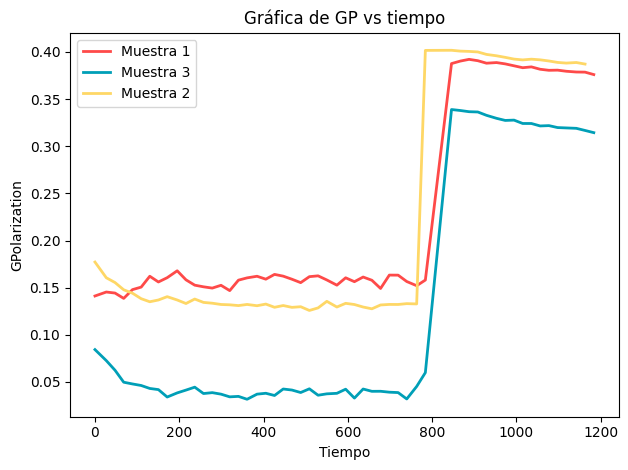

In [72]:
df['Sample'] = df['Sample'].str.strip()
df[['Time','GPolarization','I1','I2']] = df[['Time','GPolarization','I1','I2']].apply(pd.to_numeric, errors='coerce')

label_map = {'Sample': 'Muestra 1', 'Blank': 'Muestra 2', 'Reference': 'Muestra 3'}
color_map  = {'Muestra 1': '#fe4a49',   # azul
              'Muestra 2': '#fed766',   # naranja
              'Muestra 3': '#009fb7'}   # verde

plt.figure()
for name, sub in df.groupby('Sample', sort=False):
    label = label_map.get(name, name)
    plt.plot(sub['Time'], sub['GPolarization'],
    label=label,
    color=color_map.get(label), 
    linewidth=2)
plt.xlabel('Tiempo')
plt.ylabel('GPolarization')
plt.title('Gráfica de GP vs tiempo')
plt.legend()
plt.tight_layout()
plt.show()


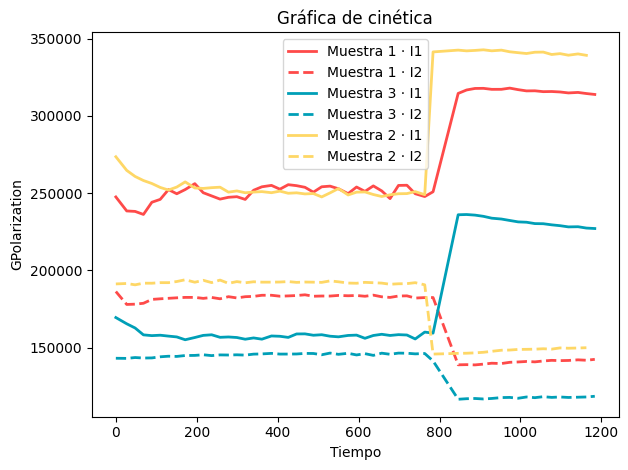

In [75]:
df['Sample'] = df['Sample'].str.strip()
df[['Time','GPolarization','I1','I2']] = df[['Time','GPolarization','I1','I2']].apply(pd.to_numeric, errors='coerce')

label_map = {'Sample': 'Muestra 1', 'Blank': 'Muestra 2', 'Reference': 'Muestra 3'}
color_map  = {'Muestra 1': '#fe4a49',   # azul
              'Muestra 2': '#fed766',   # naranja
              'Muestra 3': '#009fb7'}   # verde

plt.figure()
for name, sub in df.groupby('Sample', sort=False):
    base = label_map.get(name, name)
    col  = color_map.get(base)

    plt.plot(sub['Time'], sub['I1'], label=f'{base} · I1', color=col, linewidth=2)
    plt.plot(sub['Time'], sub['I2'], label=f'{base} · I2', color=col, linewidth=2, linestyle='--')

plt.xlabel('Tiempo')
plt.ylabel('GPolarization')
plt.title('Gráfica de cinética')
plt.legend()
plt.tight_layout()
plt.show()